In [2]:
import numpy as np
from typing import Tuple, TextIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_selection as fs
from sklearn import preprocessing as prep
from scipy import stats as stats

from sklearn.model_selection import train_test_split


# PART 1: PREPARATION

In [3]:
# Convenience Constant

PROVINCE_CODES = (
        ('10','NL'),
        ('11','PE'),
        ('12','NS'),
        ('13','NB'),
        ('24','QC'),
        ('35','ON'),
        ('46','MB'),
        ('47','SK'),
        ('48','AB'),
        ('59','BC'),
        ('60','NN') # NN is a combined code for NT, NU and YK
    )

# PART 1: PREPARATION

# Change data types to:
# - 'U2' for nominal
# - int for ordinal
# - float for interval
# - float for ratio

DATA_COLUMNS = [
('alcofreq', int),
('alcoweek', float),
('biosex', 'U2'),
('agegroup', int),
('education', int),
('fruitvegtot', float),
('stressgen', int),
('stresswork', int),
('healthphys', int),
('healthment', int),
('satisfaction', int),
('province', 'U2'),
('hasdoctor', 'U2'),
('bmi', float),
('height', float),
('weight', float),
('incomegroup', int),
('workhoursperweek', float),
('firstlanguage', 'U2'),
('yrsmokedaily', float)
]


# Fill out tuples with nominal, ordinal, interval, and ratio column names

NOMINAL = ('biosex',
           'province',
           'hasdoctor',
           'firstlanguage')
ORDINAL = ('alcofreq',
           'agegroup',
           'education',
           'stressgen',
           'stresswork',
           'healthphys',
           'healthment',
           'satisfaction',
           'incomegroup')
           
INTERVAL = ()

RATIO = ('alcoweek',
         'fruitvegtot',
         'bmi',
         'height',
         'weight',
         'workhoursperweek',
         'yrsmokedaily')



# PART 2: FUNCTIONS

In [4]:
# PART 2: FUNCTIONS

def replace_nominal_codes(data: np.array, column_name: str, codes: Tuple[Tuple[str, str]]) -> None:
    '''Precondition: column_name exists in data and is a nominal data measurement scale.
    codes is a tuple of tuples containing (old code, new code).

    Change all occurrences of old code to new code in column_name of data.
    
    >>> replace_nominal_codes(CCHS, 'biosex', (('1', 'M'),('2', 'F')))
    >>> CCHS['biosex'][0]
    'F'
    >>> CCHS['biosex'][-1]
    'M'
    '''
    for subtuple in codes:
        data[column_name][data[column_name]==subtuple[0]] = subtuple[1]
        
def replace_missing_with_nan(data: np.array, column_name: str, missing_codes: Tuple[float]) -> None:
    '''Precondition: column_name exists in data and is a ratio data measurement scale.
    missing_codes is a tuple containing codes that denote missing data.
    Convert all values in column column_name of data that match the codes 
    in missing_codes to Not-A-Number values (np.nan)
    
    >>> replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    >>> CCHS['alcoweek'][2]
    nan
    >>> CCHS['alcoweek'][-3]
    nan
    '''
    
    for code in missing_codes:
        data[column_name][data[column_name] == code] = 'nan'
        
def write_categorical_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is nominal or ordinal data measurement scale.
    Write to outfile the label and counts of each category contained in column_name of data.
    
    >>> with open("csv/biosex.csv", 'w') as file:
            write_categorical_csv(CCHS, 'biosex', file)
    >>> with open("csv/biosex.csv", 'r') as check:
            for line in check:
                print(line.strip())
    biosex,count
    F,832
    M,668
    '''
    
    count_unique_val = np.unique(data[column_name], return_counts=True)
    outfile.write(column_name + ',count\n')
    for i in range(len(count_unique_val[0])):
        outfile.write(str(count_unique_val[0][i]) + ',' + str(count_unique_val[1][i]) + '\n')


def write_column_summary_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is a non-nominal data measurement scale.
    Write to outfile a line containing comma-separated values as follows:
    - The column name
    - The median of values in the column
    - (if interval or ratio) The mean of values in the column, ignoring nan
    - (if interval or ratio) The standard deviation of values in the column, ignoring nan
    
    (Examples not required)
    
    '''
    median = str(round(np.nanmedian(data[column_name]), 2))
    if str(data[column_name].dtype).startswith("int"):
        outfile.write(column_name + "," + median + ",," +'\n')
    if str(data[column_name].dtype).startswith("float"):
        mean = str(round(np.nanmean(data[column_name]), 2))
        stdev = str(round(np.nanstd(data[column_name]),2))
        outfile.write(column_name + "," + median + ',' + mean + ',' + stdev +'\n')
            


In [5]:
if __name__ == "__main__":
    
    # Uncomment when Part 1 is complete
    CCHS = np.genfromtxt('CCHSX.csv', delimiter=',', skip_header=1, dtype=DATA_COLUMNS)
    
    # Uncomment when replace_nominal_codes is complete
    replace_nominal_codes(CCHS, 'biosex', (('1','M'),('2','F')))
    replace_nominal_codes(CCHS, 'province', PROVINCE_CODES)
    replace_nominal_codes(CCHS, 'hasdoctor', (('1','Y'),('2','N')))
    replace_nominal_codes(CCHS, 'firstlanguage', (('1','EN'),('2','FR'),('3','EF'),('4','NO')))

    # Uncomment when replace_missing_with_nan is complete
    replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    replace_missing_with_nan(CCHS, 'fruitvegtot', (996,))
    replace_missing_with_nan(CCHS, 'bmi', (996,))
    replace_missing_with_nan(CCHS, 'height', (996,))
    replace_missing_with_nan(CCHS, 'weight', (996,))
    replace_missing_with_nan(CCHS, 'workhoursperweek', (996,))
    replace_missing_with_nan(CCHS, 'yrsmokedaily', (996,))
    
    # Uncomment when write_categorical_csv is complete
    for c in NOMINAL + ORDINAL:
        with open("csv/"+c+'.csv', 'w') as f:
            write_categorical_csv(CCHS, c, f)
    
    # Uncomment when ordinal_column_csv is complete
    with open("csv/summary.csv", 'w') as f:
        f.write("COLUMN,MEDIAN,MEAN,STDEV\n")
        for n in ORDINAL + INTERVAL + RATIO:
            write_column_summary_csv(CCHS, n, f)

# PART 3: PLOT AND PLAY
## 1. Understanding the variables through visualization
As the first step, we visualize the data in order to make our data easier for the human brain to understand and makes it easier to detect patterns, trends, and outliers.

### 1.1 Visualizing Nominal Data to Bar Graphs

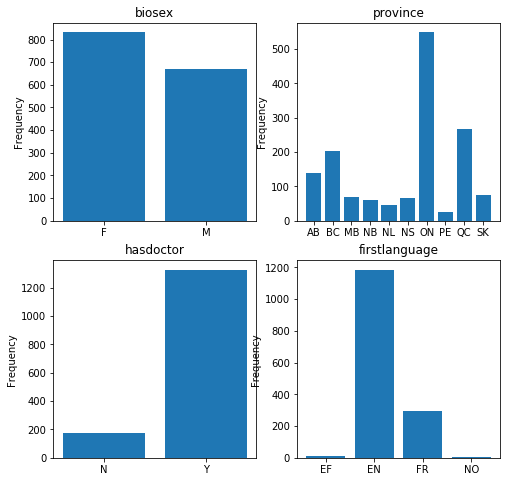

In [6]:
#Defining the canvas shape and figures sizes
plots_size = (8,8)
plt.figure(1, figsize=plots_size)
#------------------
#First we need the number of nominal variables
rows = 221
counter_num_subplots = 0 
subplot_position = 0
count = np.asarray(DATA_COLUMNS)

for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == 'U2':
        with open("csv/" + DATA_COLUMNS[i][0] + ".csv") as file:
            subplot_file = np.genfromtxt(file, delimiter=',', skip_header=1, dtype='U16')
        plot_bar = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_bar.bar(subplot_file[:,0], subplot_file[:,1].astype('float64'), label='PSS')
        plot_bar.set_title(DATA_COLUMNS[i][0])
        plot_bar.set_ylabel('Frequency')
        rows += 1
plt.show()

### 1.2 Visualizing Ordinal Data to Bar Graphs

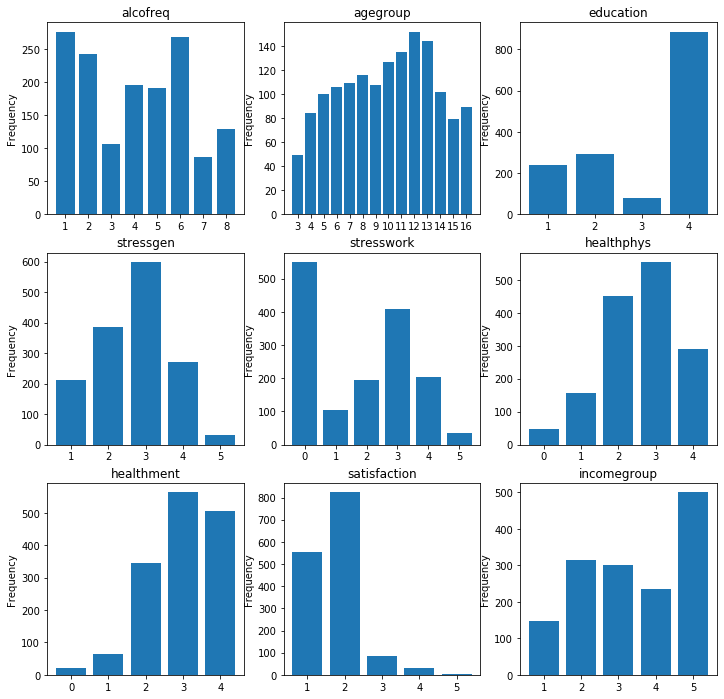

In [7]:
data_array = np.asarray(DATA_COLUMNS)
plot_shape = count[count[:,1] == int].shape
plots_size = (12,12)
plt.figure(1, figsize=plots_size)
rows = 331
counter_num_subplots = 0 
subplot_position = 0
for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == int:
        with open("csv/" + DATA_COLUMNS[i][0] + ".csv") as file:
            subplot_file = np.genfromtxt(file, delimiter=',', skip_header=1, dtype='U16')
        plot_bar = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_bar.bar(subplot_file[:,0], subplot_file[:,1].astype('float64'), label='PSS')
        plot_bar.set_title(DATA_COLUMNS[i][0])
        plot_bar.set_ylabel('Frequency')
        rows += 1
plt.show()

### 1.3 Visualizing Numerical Data to Histograms

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


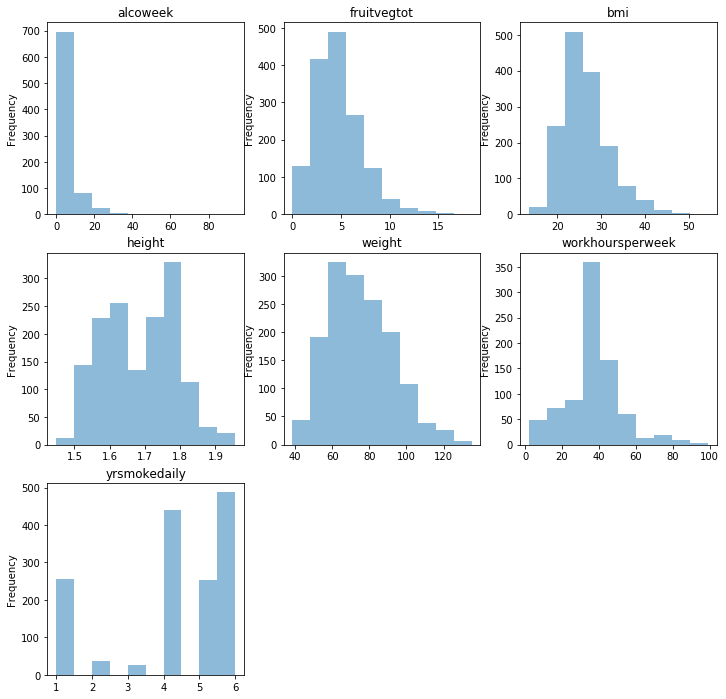

In [8]:
data_array = np.asarray(DATA_COLUMNS)
plot_shape = count[count[:,1] == float].shape
plots_size = (12,12)
plt.figure(1, figsize=plots_size)
rows = 331
counter_num_subplots = 0 
subplot_position = 0
for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == float:
        subplot = CCHS[DATA_COLUMNS[i][0]]
        plot_hist = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_hist.hist(subplot, bins=10, alpha=0.5, label='PSS')
        plot_hist.set_title(DATA_COLUMNS[i][0])
        plot_hist.set_ylabel('Frequency')
        rows += 1

## 2. Understanding the variables through a correlation matrix
We made a correlation matrix table that shows correlation coefficients between the provided variables. Each cell in the table shows the correlation between two variables. Blue indicates positive coefficients while red represents negative coefficients.

In [9]:
df = pd.DataFrame(data=CCHS)

In [10]:
corr = df.corr()

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
max_corr = corr[corr != mask].max().max()

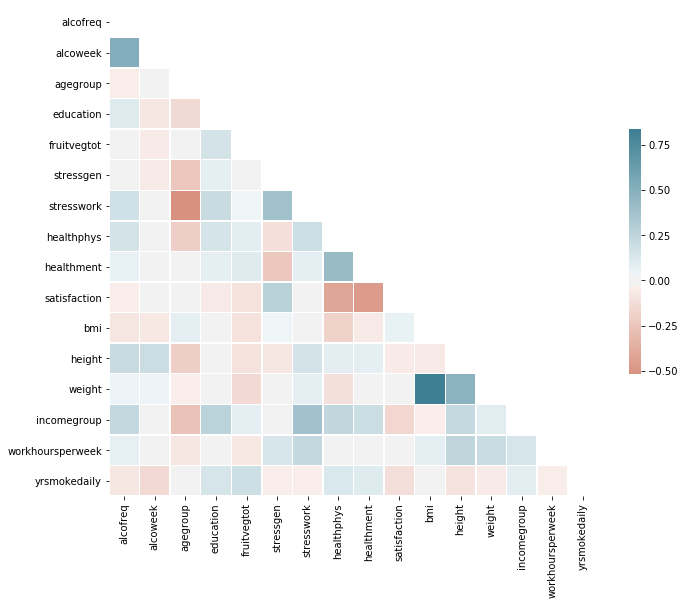

In [12]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [13]:
CCHS['alcoweek']

array([ 0.,  7., nan, ..., nan,  8.,  2.])

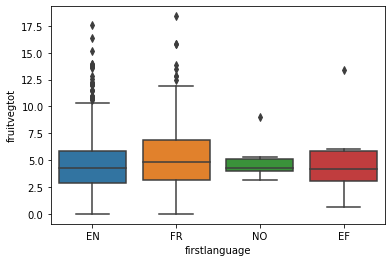

In [14]:
df = pd.DataFrame(data=CCHS)
ax = sns.boxplot(x="firstlanguage", y="fruitvegtot", data=df)

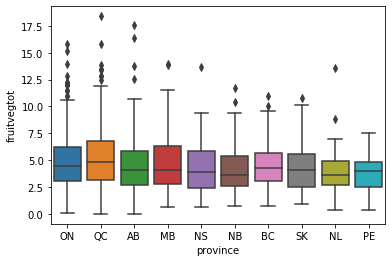

In [15]:
ax = sns.boxplot(x="province", y="fruitvegtot", data=df)

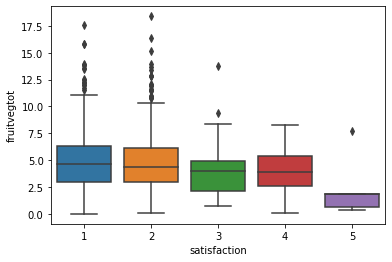

In [16]:
ax = sns.boxplot(x="satisfaction", y="fruitvegtot", data=df)

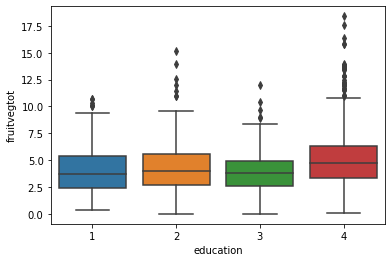

In [17]:
ax = sns.boxplot(x="education", y="fruitvegtot", data=df)

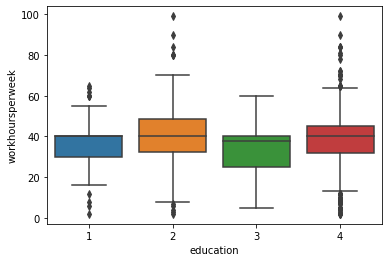

In [18]:
ax = sns.boxplot(x="education", y="workhoursperweek", data=df)

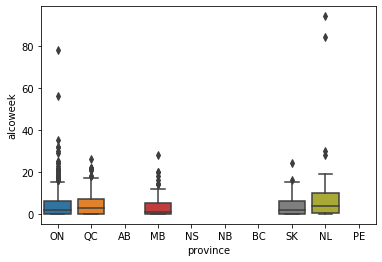

In [19]:
ax = sns.boxplot(x="province", y="alcoweek", data=df)

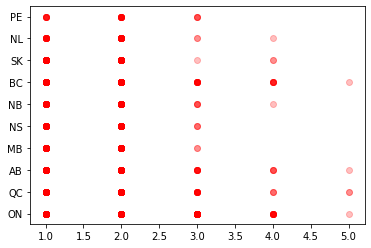

In [20]:
plt.scatter(CCHS['satisfaction'], CCHS['province'], c="r", alpha=.25,label="Luck")

In [22]:
#CCHS['satisfaction'].reshape(1, -1)
#CCHS['province'].reshape(1, -1)
#sklearn.feature_selection.chi2(CCHS['satisfaction'], CCHS['province'])

In [23]:
satisfaction =  pd.get_dummies(CCHS['satisfaction'])
satisfaction.head()
province =  pd.get_dummies(CCHS['province'])
province.head()
sklearn.feature_selection.chi2(province ,satisfaction )


NameError: name 'sklearn' is not defined

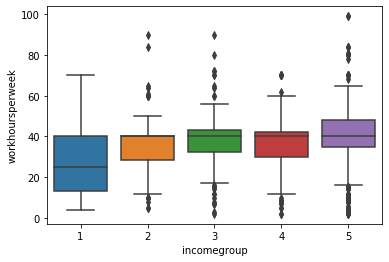

In [24]:
ax = sns.boxplot(x="incomegroup", y="workhoursperweek", data=df)

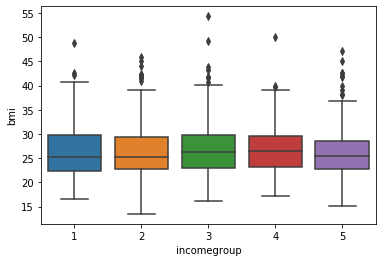

In [25]:
ax = sns.boxplot(x="incomegroup", y="bmi", data=df)

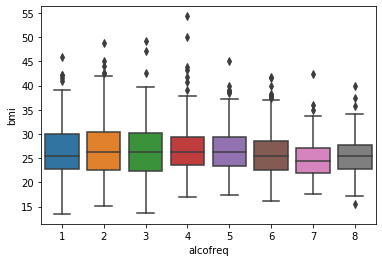

In [26]:
ax = sns.boxplot(x="alcofreq", y="bmi", data=df)

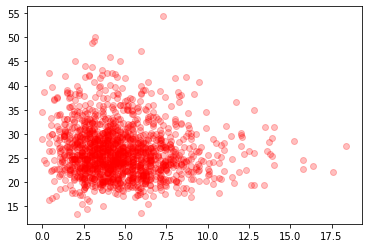

In [29]:
#ax = sns.boxplot(x="bmi", y="fruitvegtot", data=df)
plt.scatter(CCHS['fruitvegtot'], CCHS['bmi'], c="r", alpha=.25,label="Luck")

In [70]:
#Create dataframe
df = pd.DataFrame(data=CCHS)
#Clean data 
df_clean = df[df.alcoweek.notnull()]

#Create X and Y axis 
X = df_clean[['fruitvegtot', 'alcoweek']]
y = df_clean[['bmi']]

#Use train_test_split from sklearn to split data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)

In [71]:
# OLS continuous 
from sklearn import linear_model

#Create dataframe
df = pd.DataFrame(data=CCHS)
#Clean data 
df_clean = df[df.alcoweek.notnull()]

regr = linear_model.LinearRegression()
train_x = np.asanyarray(X_train[['fruitvegtot', 'alcoweek']])
train_y = np.asanyarray(y_train[['bmi']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.24000942 -0.05557723]]
Intercept:  [27.95722486]


In [72]:
y_hat= regr.predict(X_test[['fruitvegtot', 'alcoweek']])
x = np.asanyarray(X_test[['fruitvegtot', 'alcoweek']])
y = np.asanyarray(y_test[['bmi']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 27.50
Variance score: 0.00
